# 15CSE481 - Machine Learning And Data Mining Lab
## Case study - Group 17 
Parripati Divyasri - `CB.EN.U4CSE18041`

Harish K - `CB.EN.U4CSE18501`


## Dry Beans Classification


In [55]:
!pip install squarify

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import warnings
warnings.filterwarnings('ignore')

#importing necessary modules
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report


In [58]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dry_Bean.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,NaN,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [59]:
print("Number of instances in the dataset:\t{}".format(data.shape[0]))
print("Number of features in the dataset :\t{}".format(data.shape[1]))

Number of instances in the dataset:	13611
Number of features in the dataset :	17


In [60]:
list(data.columns)

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'Class']

# Exploratory Data Analysis

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13609 non-null  float64
 2   MajorAxisLength  13607 non-null  float64
 3   MinorAxisLength  13602 non-null  float64
 4   AspectRation     13607 non-null  float64
 5   Eccentricity     13605 non-null  float64
 6   ConvexArea       13607 non-null  float64
 7   EquivDiameter    13609 non-null  float64
 8   Extent           13609 non-null  float64
 9   Solidity         13610 non-null  float64
 10  roundness        13605 non-null  float64
 11  Compactness      13605 non-null  float64
 12  ShapeFactor1     13608 non-null  float64
 13  ShapeFactor2     13608 non-null  float64
 14  ShapeFactor3     13609 non-null  float64
 15  ShapeFactor4     13609 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [62]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13609.000000,13607.000000,13602.000000,13607.000000,13605.000000,13607.000000,13609.000000,13609.000000,13610.000000,13605.000000,13605.000000,13608.000000,13608.000000,13609.000000,13609.000000
mean,53048.284549,855.302216,320.164140,202.281275,1.583358,0.750915,53773.304917,253.070061,0.749728,0.987143,0.873275,0.799836,0.006564,0.001716,0.643574,0.995063
std,29324.095717,214.299629,85.696444,44.982812,0.246622,0.091920,29777.787660,59.179500,0.049087,0.004661,0.059518,0.061702,0.001128,0.000596,0.098989,0.004367
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.557000,253.320436,175.825000,1.432362,0.715948,36717.000000,215.076884,0.718632,0.985670,0.832139,0.762438,0.005900,0.001153,0.581329,0.993703
50%,44652.000000,794.950000,296.908488,192.452036,1.551290,0.764446,45203.000000,238.456715,0.759847,0.988284,0.883137,0.801227,0.006645,0.001693,0.641991,0.996385
75%,61332.000000,977.222000,376.504333,217.043193,1.707245,0.810461,62305.000000,279.448745,0.786851,0.990013,0.916865,0.834235,0.007272,0.002170,0.696006,0.997881
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Distribution Analysis

Here we will visualize the distribution of some of the important features of respective classes

#### SEKER 

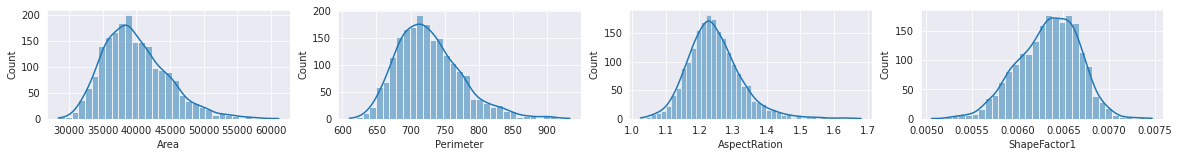

In [63]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
df = data
sns.histplot(ax=axs[0], data=df[df['Class']=='SEKER'], x='Area', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='SEKER'], x='Perimeter', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='SEKER'], x='AspectRation', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='SEKER'], x='ShapeFactor1', kde=True)
plt.show()

#### BARBUNYA 

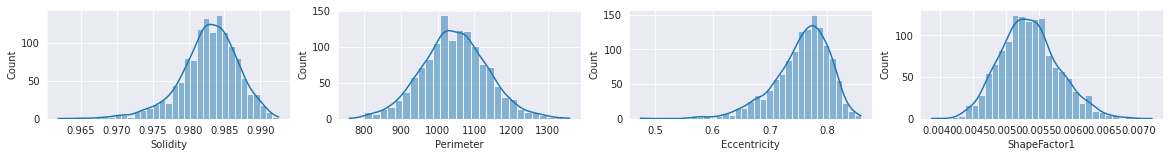

In [64]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='BARBUNYA'], x='Solidity', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='BARBUNYA'], x='Perimeter', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='BARBUNYA'], x='Eccentricity', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='BARBUNYA'], x='ShapeFactor1', kde=True)
plt.show()

#### BOMBAY 

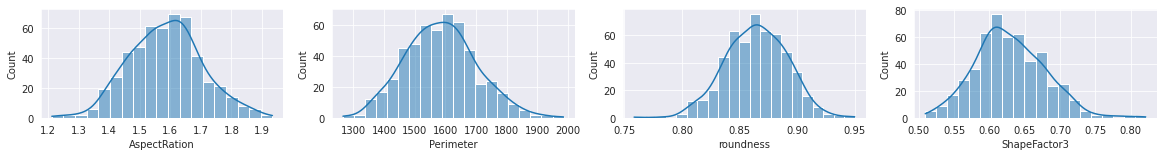

In [65]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='BOMBAY'], x='AspectRation', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='BOMBAY'], x='Perimeter', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='BOMBAY'], x='roundness', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='BOMBAY'], x='ShapeFactor3', kde=True)
plt.show()

#### CALI 

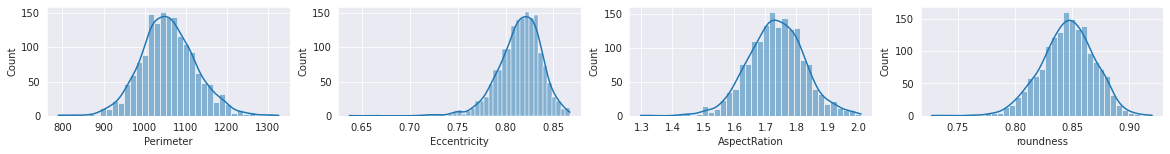

In [66]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='CALI'], x='Perimeter', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='CALI'], x='Eccentricity', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='CALI'], x='AspectRation', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='CALI'], x='roundness', kde=True)
plt.show()

#### HOROZ CLASS

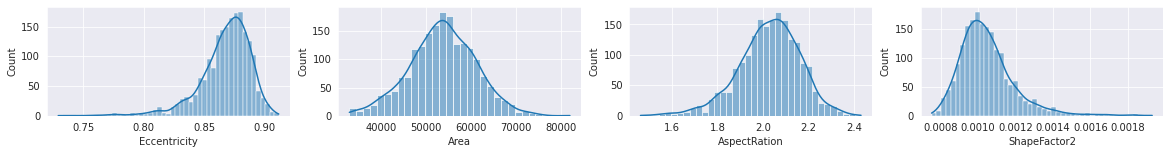

In [67]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='HOROZ'], x='Eccentricity', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='HOROZ'], x='Area', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='HOROZ'], x='AspectRation', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='HOROZ'], x='ShapeFactor2', kde=True)
plt.show()

#### SIRA 

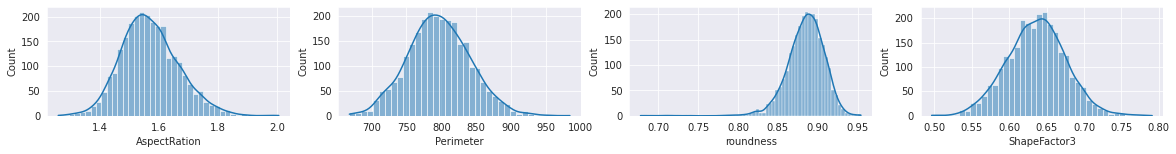

In [68]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='SIRA'], x='AspectRation', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='SIRA'], x='Perimeter', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='SIRA'], x='roundness', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='SIRA'], x='ShapeFactor3', kde=True)
plt.show()

#### DERMASON 

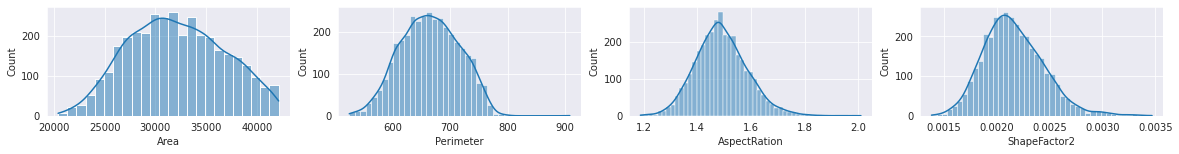

In [69]:
fig, axs = plt.subplots(1, 4, figsize=(20, 2))
sns.histplot(ax=axs[0], data=df[df['Class']=='DERMASON'], x='Area', kde=True)
sns.histplot(ax=axs[1], data=df[df['Class']=='DERMASON'], x='Perimeter', kde=True)
sns.histplot(ax=axs[2], data=df[df['Class']=='DERMASON'], x='AspectRation', kde=True)
sns.histplot(ax=axs[3], data=df[df['Class']=='DERMASON'], x='ShapeFactor2', kde=True)
plt.show()

# Preparing the Data

## Feature Selection

### Correlation Heatmap

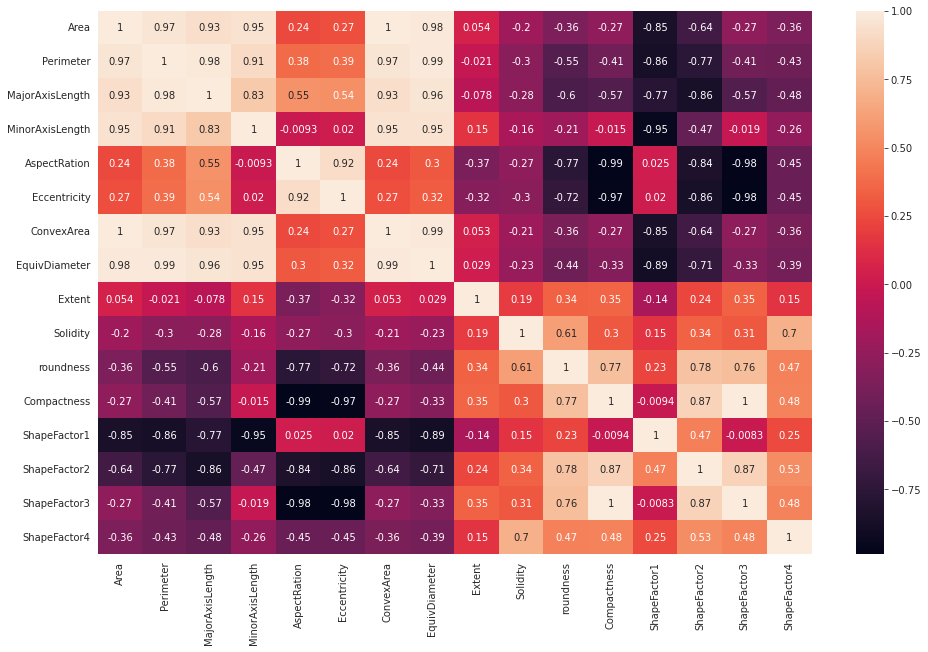

In [70]:
#Analysing heat map
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Multicollinearity (high inter-correlation between variables) exists between the features Area, ConvexArea and EquivDiameter

So, we drop two columns(ConvexArea, EquivDiameter) here

In [71]:
df = data.drop(labels=["ConvexArea", "EquivDiameter"], axis=1)

## Handling null values

In [72]:
df.isnull().sum()

Area               0
Perimeter          2
MajorAxisLength    4
MinorAxisLength    9
AspectRation       4
Eccentricity       6
Extent             2
Solidity           1
roundness          6
Compactness        6
ShapeFactor1       3
ShapeFactor2       3
ShapeFactor3       2
ShapeFactor4       2
Class              0
dtype: int64

From the distribution analysis, we can see that the data is skewed for most of the features. Thus, we fill the null values with median.

In [73]:
df = df.fillna(df.median())

In [74]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## Outlier Detection and Removal

### Detection using Boxplot

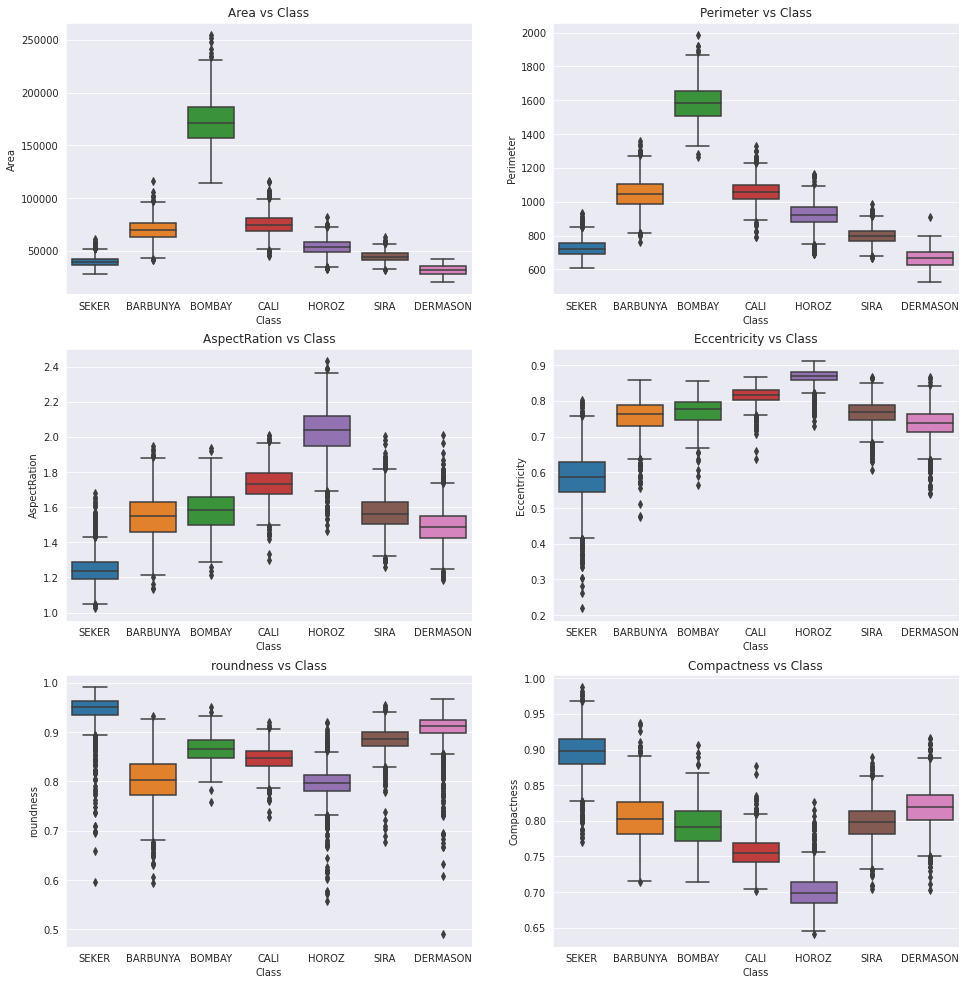

In [75]:
features = [["Area","Perimeter"],["AspectRation","Eccentricity"], ["roundness","Compactness"]]
fig, axs = plt.subplots(3, 2, figsize=(16, 17))

for i in range(3):
    for j in range(2):
        sns.boxplot(ax=axs[i, j], x="Class",y=features[i][j],data=df)
        axs[i, j].set_title(features[i][j]+" vs Class")

The boxplot shows that all the features of each class contains outliers that needs to be handled

### Removing Outliers

In [76]:
classes = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
features = list(df.columns)[:-1]  #exclude last column

df_list = []
for cls in classes:
  df_t = df[df['Class'] == cls]
  for feature in features:
    q1 = np.percentile(df_t[feature], 25)
    q3 = np.percentile(df_t[feature], 75)
    iqr = q3 - q1
    cutoff = 1.5 * iqr
    df_t = df_t[(df_t[feature] > q1-cutoff) & (df_t[feature] < q3+cutoff)]
  df_list.append(df_t)

df = pd.concat(df_list) # changing the previous dataframe with outliers to one witout outliers

	Boxplot after removing outliers



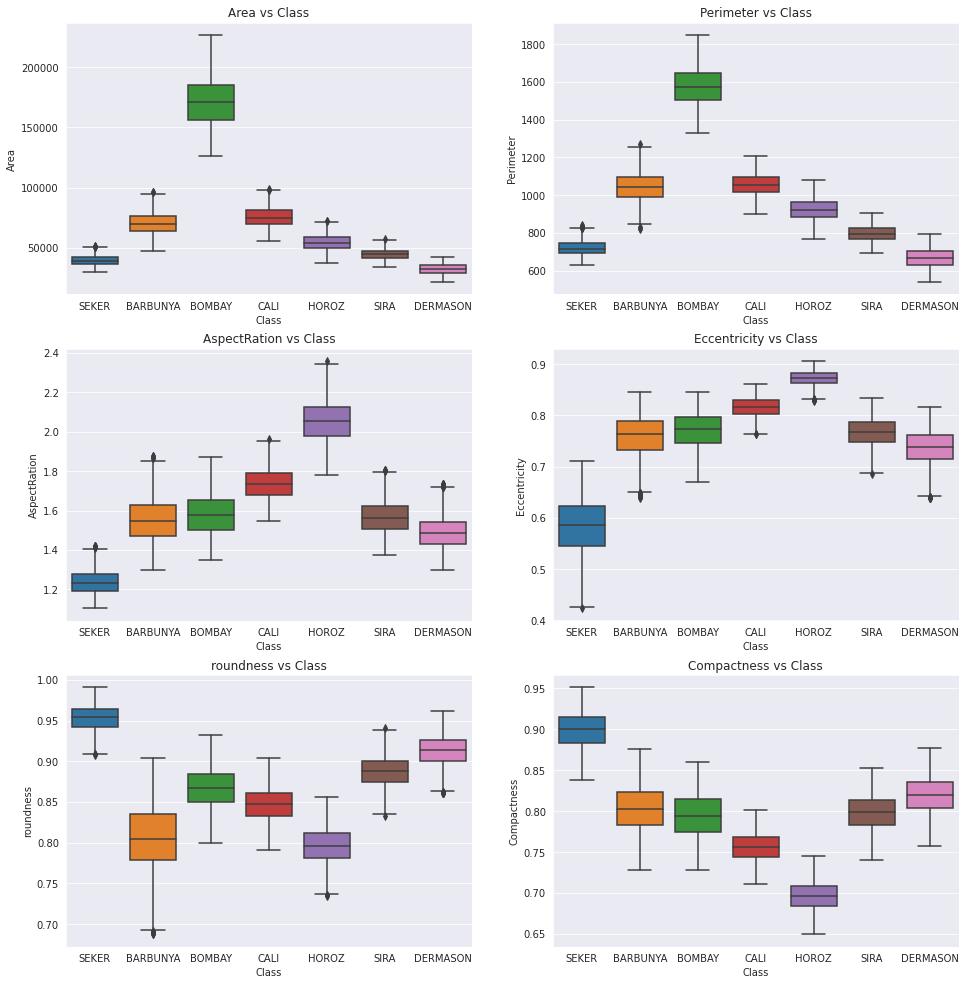

In [77]:
features = [["Area","Perimeter"],["AspectRation","Eccentricity"], ["roundness","Compactness"]]
fig, axs = plt.subplots(3, 2, figsize=(16, 17))
print("\tBoxplot after removing outliers\n")
for i in range(3):
    for j in range(2):
        sns.boxplot(ax=axs[i, j], x="Class",y=features[i][j],data=df)
        axs[i, j].set_title(features[i][j]+" vs Class")

In [78]:
print("Number of instances in dataset after removing outliers:", df.shape[0])
_df = df

Number of instances in dataset after removing outliers: 11645


1966 instances have been removed in the process of outlier removal

## Splitting data into training and testing sets

Here we split 60% of the data for training and rest 40% for testing

In [79]:
dataAttributes = _df.drop("Class",axis=1)
dataClasses = _df[["Class"]]

x_train, x_test, y_train, y_test = train_test_split(dataAttributes, dataClasses, test_size=0.2, random_state=42)

## Normalization using Standard Scaler

The scale of the features could affect the learning model's accuracy. Thus there is a necessity to change the values of the features in the dataset to use a common scale. 

Here we achieve this using Standard Scaler


In [80]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

df = pd.DataFrame(x_train, columns=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4'])
df['Class'] = list(y_train["Class"])


In [81]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1.320209,1.466353,1.532191,1.324978,0.576023,0.706164,-1.238866,-0.731979,-0.554107,-0.702111,-1.466190,-1.214866,-0.721119,-2.122314,CALI
1,-0.433220,-0.543709,-0.592969,-0.243479,-0.712979,-0.535123,0.436374,0.819246,1.002189,0.687860,0.099698,0.592679,0.667707,0.699584,SIRA
2,-0.586790,-0.813262,-0.985761,-0.182674,-1.501032,-2.054799,0.392571,1.550675,1.760668,1.754988,0.009355,1.727374,1.833001,1.044858,SEKER
3,-0.485822,-0.514283,-0.464712,-0.556921,-0.003496,0.259644,-0.713167,0.421415,0.109251,-0.110363,0.587643,0.080478,-0.147701,-0.019134,SIRA
4,-0.409465,-0.497721,-0.673468,-0.056977,-1.095180,-1.150714,0.863973,0.787971,0.847194,1.172931,-0.150710,0.939477,1.186735,0.721630,SEKER


# Data Visualiztion

### CountPlot

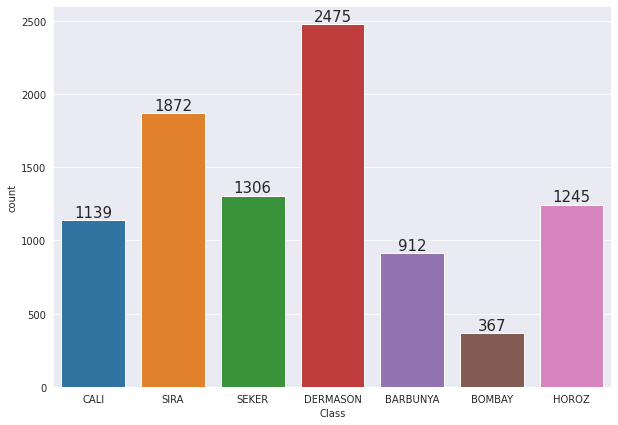

In [82]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x=df['Class'])
for i in ax.patches:
  ax.annotate("{}".format(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom', size=15)
plt.show()

Here we can see that Dermason class has the most number of instances and Bombay class has the least number of instances

### Tree map

In [83]:
classCounts = list(df.groupby("Class")["Area"].count())

In [84]:
classes = sorted(set(df['Class']))

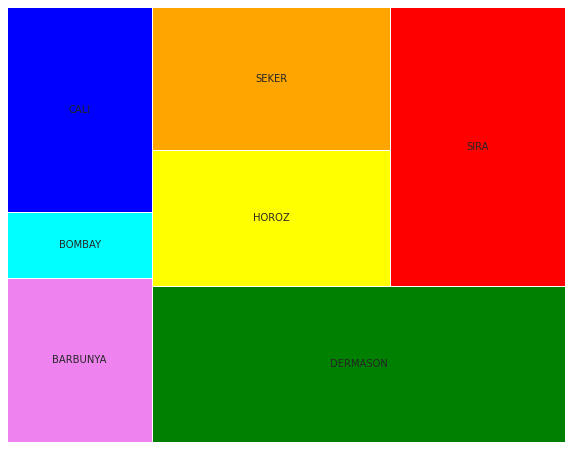

In [85]:
fig, ax = plt.subplots(1, figsize = (10,8))
squarify.plot(sizes=classCounts, label=classes, color=["violet", "cyan", "blue", "green", "yellow", "orange", "red"])
plt.axis('off')
plt.show()

### Parallel coordinates

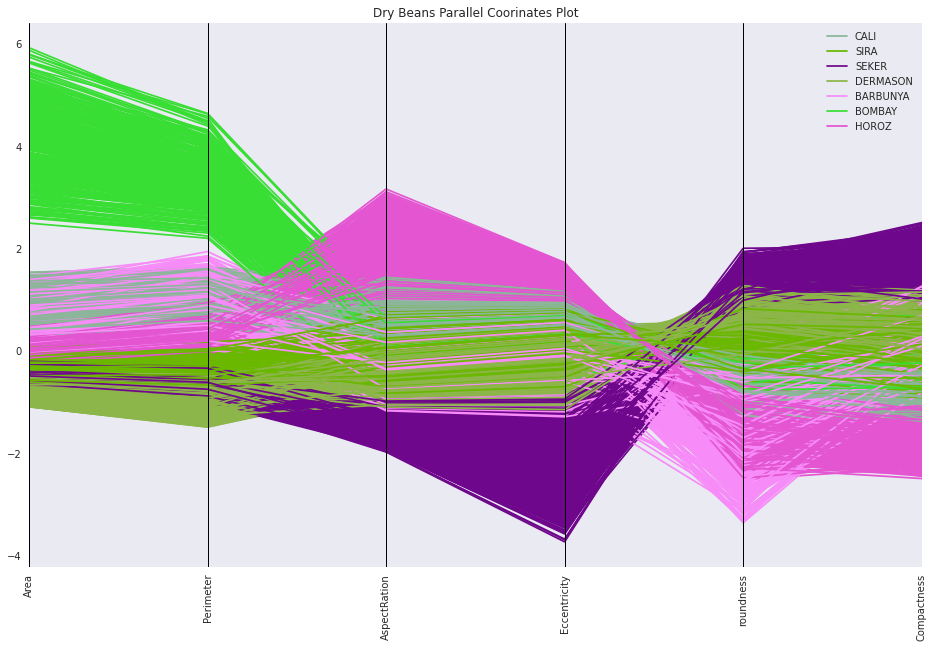

In [86]:
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(16,10))
    pd.plotting.parallel_coordinates(df[["Area","Perimeter","AspectRation","Eccentricity", "roundness","Compactness","Class"]], "Class")
    plt.xticks(rotation=90)
    plt.title("Dry Beans Parallel Coorinates Plot")

- The beans belonging to Bombay class has higher area and perimeter as compared to other classes
- The beans belonging to Horoz class has the highest AspectRation
- Seker class has the highest eccentricity
- Barbunya class has the lowest roundness
- Seker class has the highest compactness

### Scatter Matrix

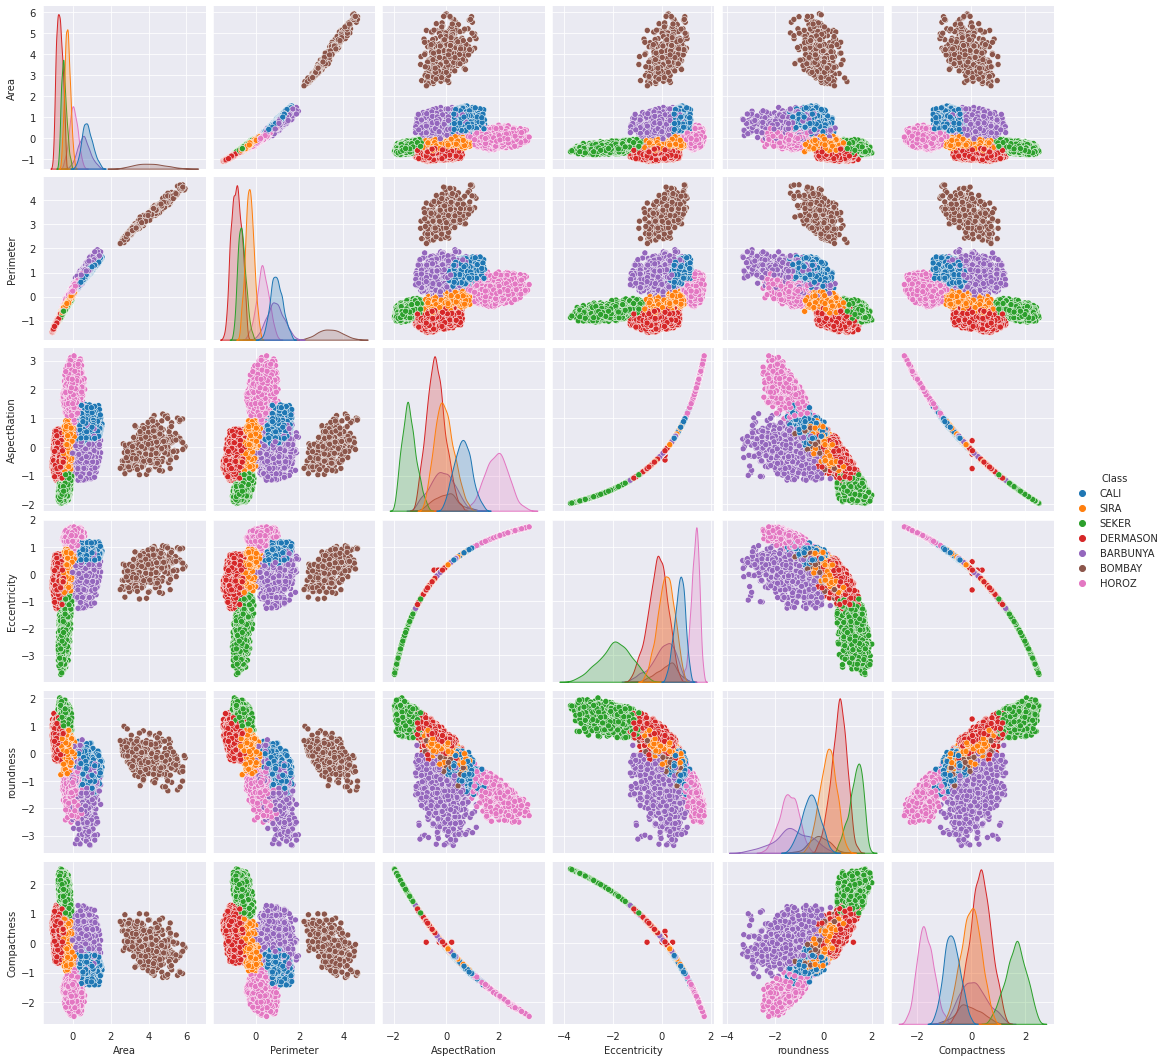

In [87]:
df_6 = df[["Area","Perimeter","AspectRation","Eccentricity", "roundness","Compactness","Class"]]
sns.set_style("darkgrid")
sns.pairplot(df_6, hue="Class", palette="tab10")
plt.show()

From the above scatter matrix, we can infer that:
- BOMBAY class is linearly separable from the other classes

- There exists a positive correlation between AspectRation and Eccentricity whereas we see a negative correlation between Eccentricity and Compactness

- The features - Area and Perimeter - show a positive correlation

# Classification

In [88]:
y_train = np.ravel(y_train)

# confusion matrix
def plotConfusionMatrix(y_test, y_pred):
  plt.figure(figsize=(8,5))
  labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
  cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=labels, columns=labels)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.ylabel("True labels")
  plt.xlabel("Predicted labels")
  plt.xticks(rotation=90)
  plt.show()

def format_score(score):
  return round(score*100, 4) 

## Support Vector Machine

### Using SVM classifier with default parameters

Accuracy: 95.6204


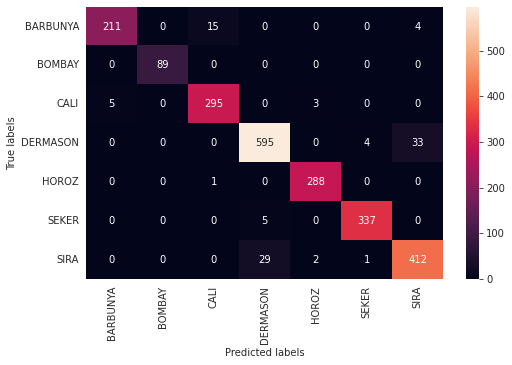

In [89]:
SVMClassifier = svm.SVC()
SVMClassifier.fit(x_train, y_train)
y_pred = SVMClassifier.predict(x_test)
score_ = SVMClassifier.score(x_test,y_test)

print("Accuracy:", format_score(score_))

plotConfusionMatrix(y_test, y_pred)
    

### Hyperparameter Tuning

In [90]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear']}

svmGrid = GridSearchCV(svm.SVC(), param_grid)
 
# fitting the model for grid search
svmGrid.fit(x_train, y_train)

print(svmGrid.best_estimator_)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [91]:
y_pred = svmGrid.predict(x_test)
print("Accuracy:", format_score(svmGrid.score(x_test, y_test)))
print(classification_report(y_test,y_pred))

Accuracy: 95.9639
              precision    recall  f1-score   support

    BARBUNYA       0.98      0.94      0.96       230
      BOMBAY       1.00      1.00      1.00        89
        CALI       0.96      0.97      0.97       303
    DERMASON       0.95      0.94      0.94       632
       HOROZ       0.99      1.00      0.99       289
       SEKER       0.99      0.99      0.99       342
        SIRA       0.92      0.93      0.92       444

    accuracy                           0.96      2329
   macro avg       0.97      0.97      0.97      2329
weighted avg       0.96      0.96      0.96      2329



Here, we can see that the accuracy of SVM classifier has improved from 95.62% to 95.96%

### Polynomial kernel function

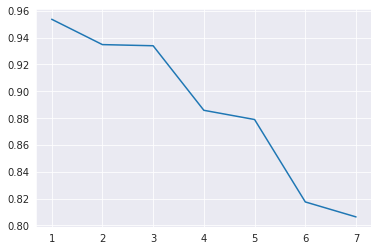

In [92]:
x = range(1, 8)
y = []
for i in x:
  tmp = svm.SVC(kernel='poly', degree=i)
  tmp.fit(x_train, y_train)
  y.append(tmp.score(x_test,y_test))  

plt.plot(x, y)

From the plot above, we can see that polynomial kernel function works well with degree=1, which is equivalent to linear kernel function

## Decision Tree

### Using DT classifier with default parameters

Accuracy: 94.2894


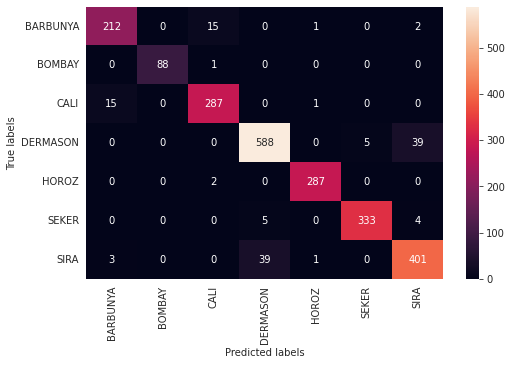

In [111]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

print("Accuracy:", format_score(decision_tree.score(x_test, y_test)))
plotConfusionMatrix(y_test, y_pred)

### Hyperparameter Tuning

In [112]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'criterion': ["gini", "entropy"]
}

dtGrid = GridSearchCV(DecisionTreeClassifier(random_state=0), params)
dtGrid.fit(x_train, y_train)

print(dtGrid.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [113]:
y_pred = dtGrid.predict(x_test)
print("Accuracy:", format_score(dtGrid.score(x_test, y_test)))
print(classification_report(y_test,y_pred))

Accuracy: 94.2035
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.93       230
      BOMBAY       1.00      0.99      0.99        89
        CALI       0.93      0.96      0.95       303
    DERMASON       0.92      0.94      0.93       632
       HOROZ       0.99      0.99      0.99       289
       SEKER       0.98      0.97      0.97       342
        SIRA       0.90      0.89      0.90       444

    accuracy                           0.94      2329
   macro avg       0.95      0.95      0.95      2329
weighted avg       0.94      0.94      0.94      2329



## k-Nearest Neighbours

### Using kNN classifier with default parameters

Accuracy: 95.5346


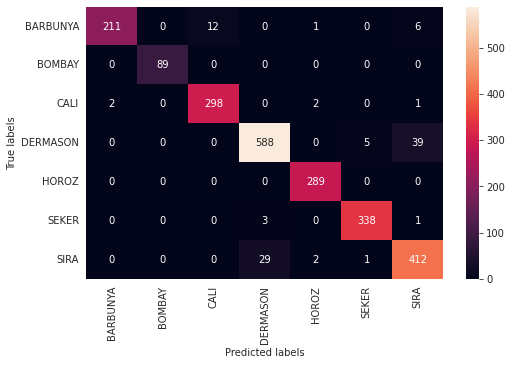

In [96]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", format_score(model.score(x_test, y_test)))
plotConfusionMatrix(y_test, y_pred)

### Hyperparameter Tuning

In [97]:
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    accuracy.append(knn.score(x_test, y_test))

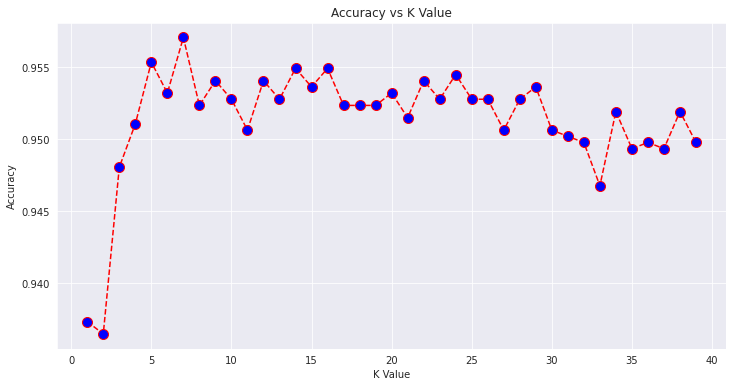

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

From the plot above, we can see that the highest accuracy is achieved at k=7

Accuracy: 95.7063


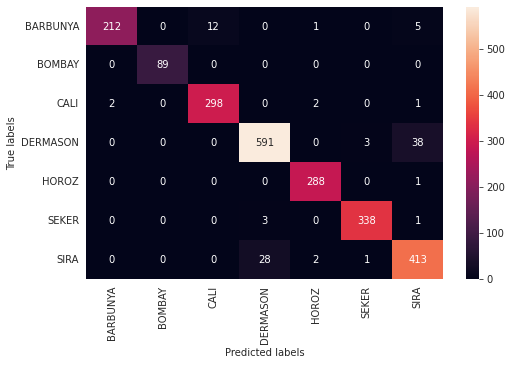

              precision    recall  f1-score   support

    BARBUNYA       0.99      0.92      0.95       230
      BOMBAY       1.00      1.00      1.00        89
        CALI       0.96      0.98      0.97       303
    DERMASON       0.95      0.94      0.94       632
       HOROZ       0.98      1.00      0.99       289
       SEKER       0.99      0.99      0.99       342
        SIRA       0.90      0.93      0.91       444

    accuracy                           0.96      2329
   macro avg       0.97      0.97      0.97      2329
weighted avg       0.96      0.96      0.96      2329



In [99]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print("Accuracy:", format_score(knn.score(x_test, y_test)))
plotConfusionMatrix(y_test, y_pred)
print(classification_report(y_test, y_pred))



Here, we can see that the accuracy of **kNN** classifier has improved from 95.5% to 95.7%

## Stochastic Gradient Descent

Accuracy: 93.4736


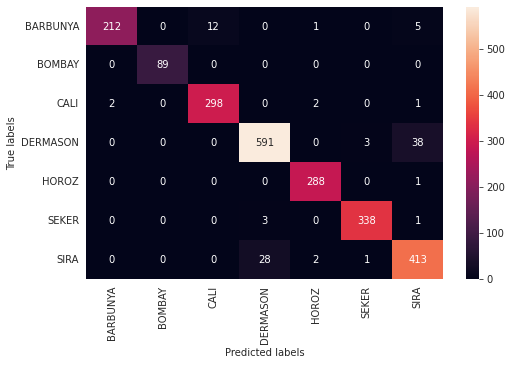

In [100]:
sgdClf = SGDClassifier(loss="hinge", penalty="l2", alpha =0.004, learning_rate = "optimal", random_state=0)
sgdClf.fit(x_train,y_train)

print("Accuracy:", format_score(sgdClf.score(x_test, y_test)))
plotConfusionMatrix(y_test, y_pred)


### Hyperparameter Tuning

In [101]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
sgdGrid = GridSearchCV(model, param_grid=params)
sgdGrid.fit(x_train, y_train)

print(sgdGrid.best_estimator_)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='none', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [102]:
y_pred = sgdGrid.predict(x_test)
print("Accuracy:", format_score(sgdGrid.score(x_test, y_test)))
print(classification_report(y_test,y_pred))

Accuracy: 94.6758
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.93      0.94       230
      BOMBAY       1.00      1.00      1.00        89
        CALI       0.96      0.94      0.95       303
    DERMASON       0.94      0.92      0.93       632
       HOROZ       0.98      1.00      0.99       289
       SEKER       0.98      0.99      0.98       342
        SIRA       0.90      0.92      0.91       444

    accuracy                           0.95      2329
   macro avg       0.96      0.96      0.96      2329
weighted avg       0.95      0.95      0.95      2329



Here, we can see that the accuracy of **Stochastic Gradient Descent** classifier has improved from 93.47% to 94.8%

## Inference
From the confusion matrices, it can be seen that we have a large proportion of correctly classified classes for the beans. Some notable observations include how there are many more instances of the DERMASON class of beans and thus we should not be surprised that there are far more incorrect classifications of the DERMASON class. In particular, there were some DERMASON beans which have been incorrectly classified as SIRA beans and vice versa. From these errors, we may assume that these two beans may be more similar to each other compared to the other beans.

Among the four models, SVM gives the highest accuracy of 95.96% followed by kNN which has an accuracy of 95.7%.



## Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

As the accuracies of SVM and kNN models are high, we use them as estimators in the Voting Classifier.

Accuracy: 96.1786


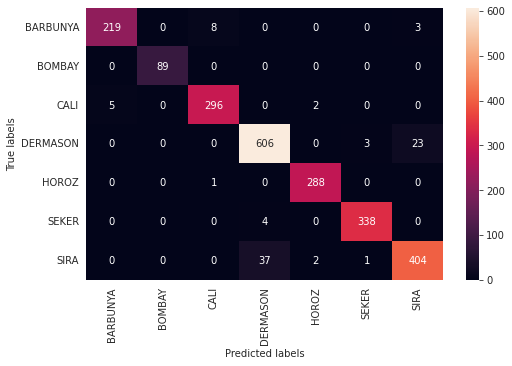

              precision    recall  f1-score   support

    BARBUNYA       0.98      0.95      0.96       230
      BOMBAY       1.00      1.00      1.00        89
        CALI       0.97      0.98      0.97       303
    DERMASON       0.94      0.96      0.95       632
       HOROZ       0.99      1.00      0.99       289
       SEKER       0.99      0.99      0.99       342
        SIRA       0.94      0.91      0.92       444

    accuracy                           0.96      2329
   macro avg       0.97      0.97      0.97      2329
weighted avg       0.96      0.96      0.96      2329



In [103]:
estimators = [
              ('svm', svmGrid.best_estimator_),
              ('knn', KNeighborsClassifier(n_neighbors=7))
]

votingClassifier = VotingClassifier(estimators=estimators)
votingClassifier.fit(x_train, y_train)
# y_pred = votingClassifier.predict(x_test)
  
y_pred = votingClassifier.predict(x_test)
print("Accuracy:", format_score(votingClassifier.score(x_test, y_test)))
plotConfusionMatrix(y_test, y_pred)
print(classification_report(y_test,y_pred))


## Results

The performance of the voting classifier is the highest achieved among all the models, with an accuracy of 96.12%. This shows that we can obtain improved accuracies with ensemble techniques.